# Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as un offensive, but “u are an idiot” is clearly offensive.


In [38]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
# Importing dataset
import pandas as pd
df = pd.read_csv( r"C:\Users\Rahul\Downloads\maligant intern project\train.csv")
df.head(20)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [40]:
df.shape

(159571, 8)

In [41]:
#Their are 159571 rows and 8 columns in dataset

In [42]:
#for displaying max. rows
pd.set_option('display.max_rows', None)

In [43]:
# checking Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [44]:
#checking datatype
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [45]:
#Two types of data type present in dataset. 1. object, 2. integer

In [46]:
#checking null values
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

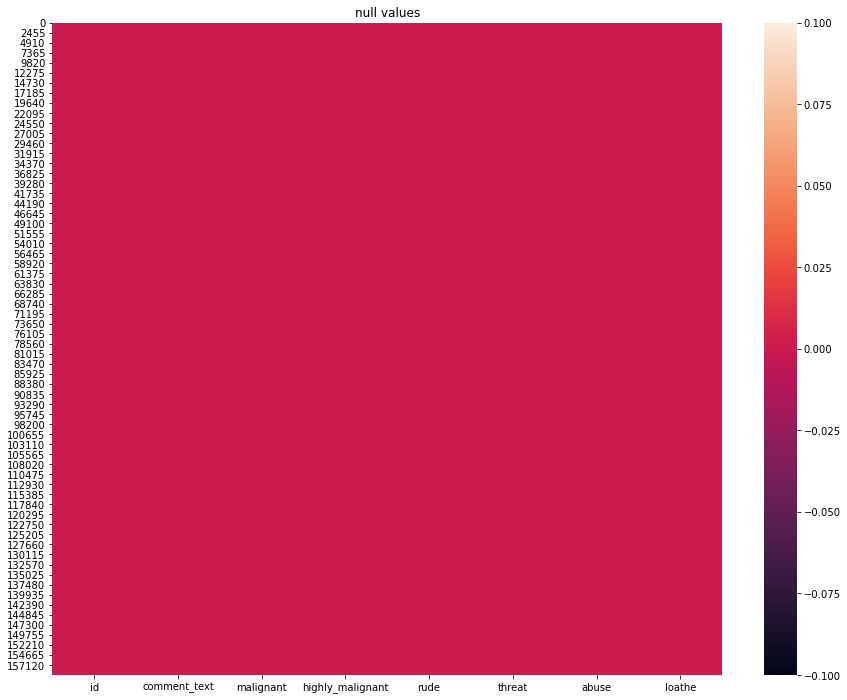

In [47]:
#Heatmap for checking null values
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [48]:
# for checking for null values- null values is not observed in dataset

In [49]:
#Converting object type data into integers
encode = LabelEncoder() 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [50]:
#checking again dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   id                159571 non-null  int32
 1   comment_text      159571 non-null  int32
 2   malignant         159571 non-null  int64
 3   highly_malignant  159571 non-null  int64
 4   rude              159571 non-null  int64
 5   threat            159571 non-null  int64
 6   abuse             159571 non-null  int64
 7   loathe            159571 non-null  int64
dtypes: int32(2), int64(6)
memory usage: 8.5 MB


In [51]:
#multivariate analysis
corr_mat=df.corr()
corr_mat

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
id,1.000000,0.002812,-0.003263,-0.001403,-0.002188,-0.001165,-0.002086,-0.000844
comment_text,0.002812,1.000000,0.132016,0.057627,0.104020,0.026093,0.111724,0.046234
malignant,-0.003263,0.132016,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,-0.001403,0.057627,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,-0.002188,0.104020,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,-0.001165,0.026093,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,-0.002086,0.111724,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,-0.000844,0.046234,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


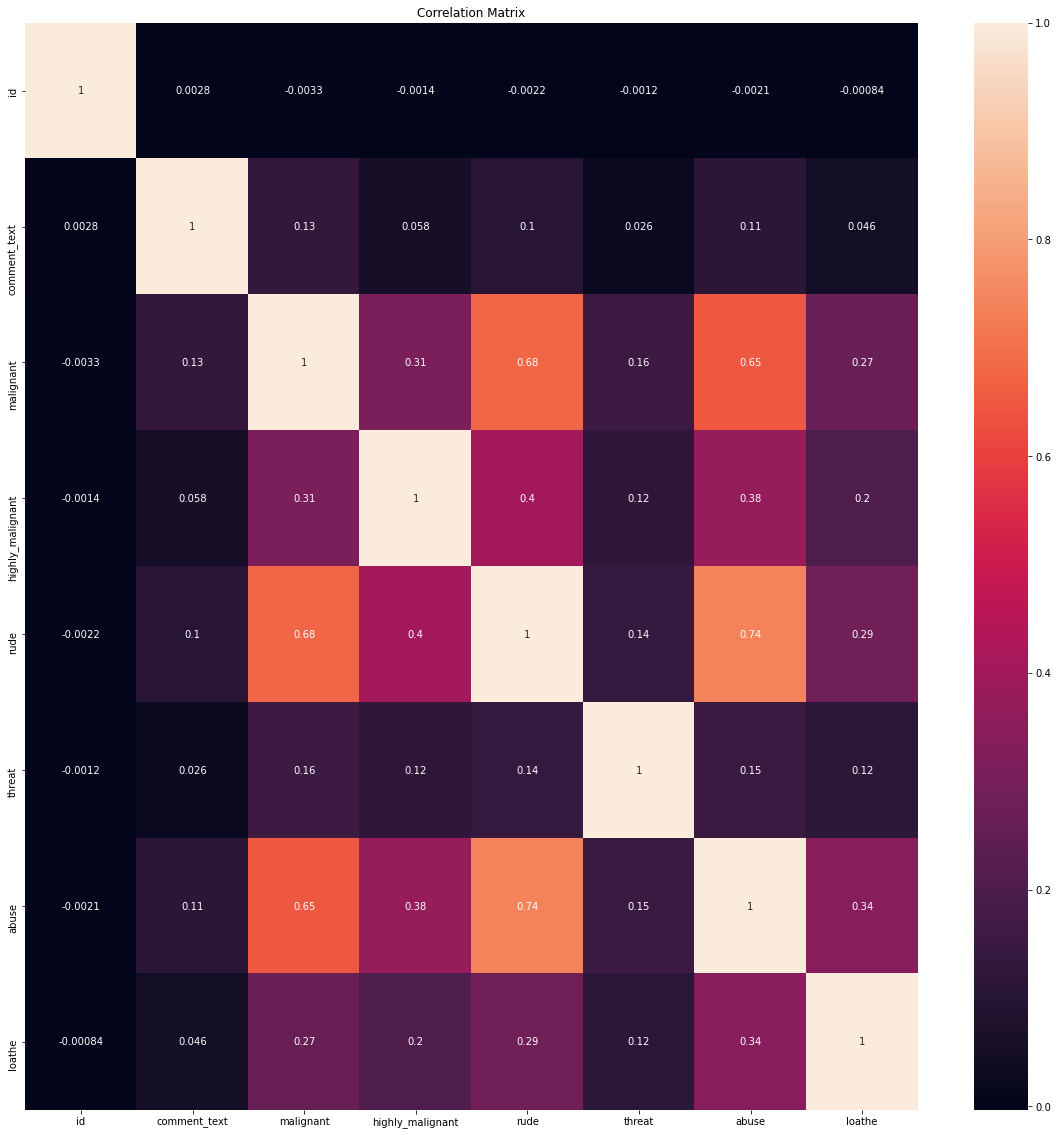

In [52]:
# heatmap for analysing correlation
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [53]:
#for better understanding correalation with target col.
corr_mat=df.corr()
corr_mat["malignant"].sort_values(ascending=False)

malignant           1.000000
rude                0.676515
abuse               0.647518
highly_malignant    0.308619
loathe              0.266009
threat              0.157058
comment_text        0.132016
id                 -0.003263
Name: malignant, dtype: float64

In [54]:
# 6 columns shown +ve correlation with label 
# 1 column shown ve correlation with label
# higest correlation is observed with rude col- 0.676515

<function matplotlib.pyplot.show(close=None, block=None)>

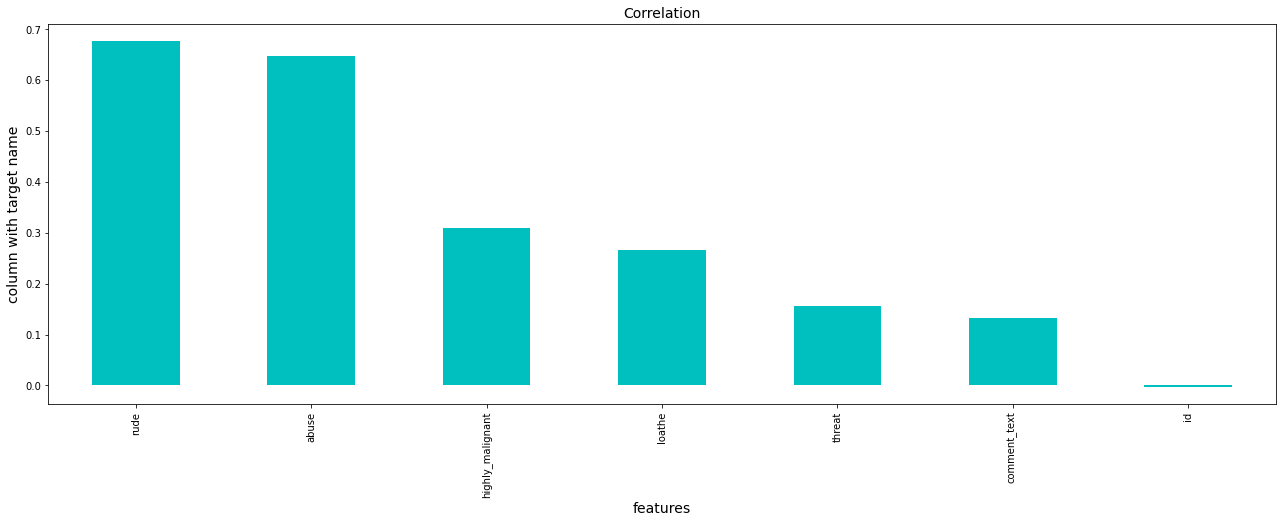

In [55]:
#plotting graph showing +ve and -ve correlation of coloumns
plt.figure(figsize=(22,7))
df.corr()['malignant'].sort_values(ascending=False).drop(['malignant']).plot(kind='bar',color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target name', fontsize=14)
plt.title('Correlation', fontsize=14)
plt.show

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'comment_text'}>,
        <AxesSubplot:title={'center':'malignant'}>,
        <AxesSubplot:title={'center':'highly_malignant'}>],
       [<AxesSubplot:title={'center':'rude'}>,
        <AxesSubplot:title={'center':'threat'}>,
        <AxesSubplot:title={'center':'abuse'}>,
        <AxesSubplot:title={'center':'loathe'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

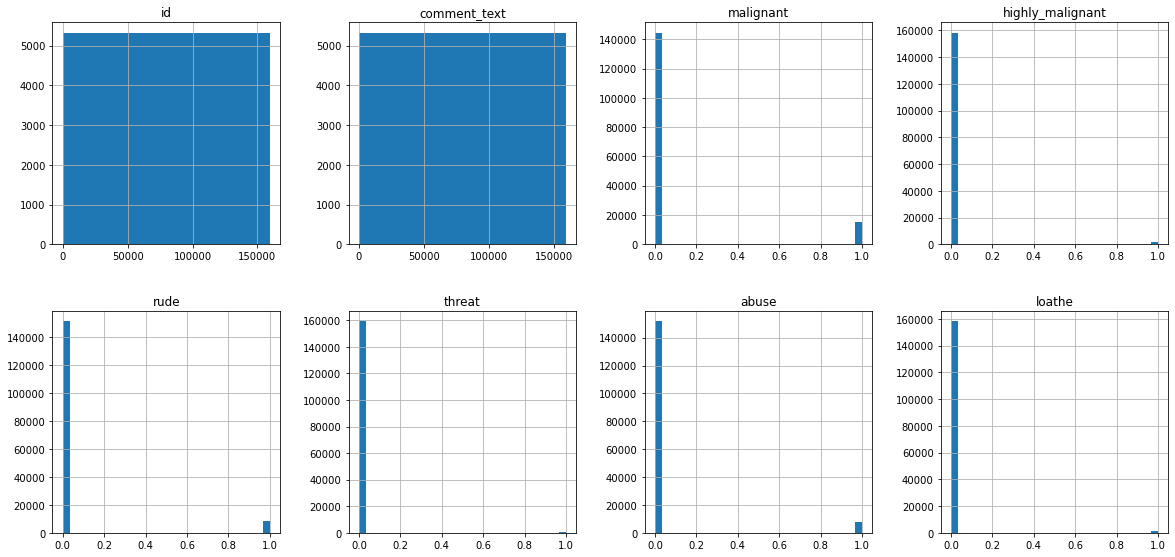

In [56]:
#plotting histogram for checking distribution
df.hist(figsize=(20, 20), grid=True, layout=(4,4),bins=30)

In [57]:
#describing dataset stats
df.describe()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.00000,159571.00000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,79785.00000,79785.00000,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,46064.32424,46064.32424,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39892.50000,39892.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79785.00000,79785.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119677.50000,119677.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,159570.00000,159570.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


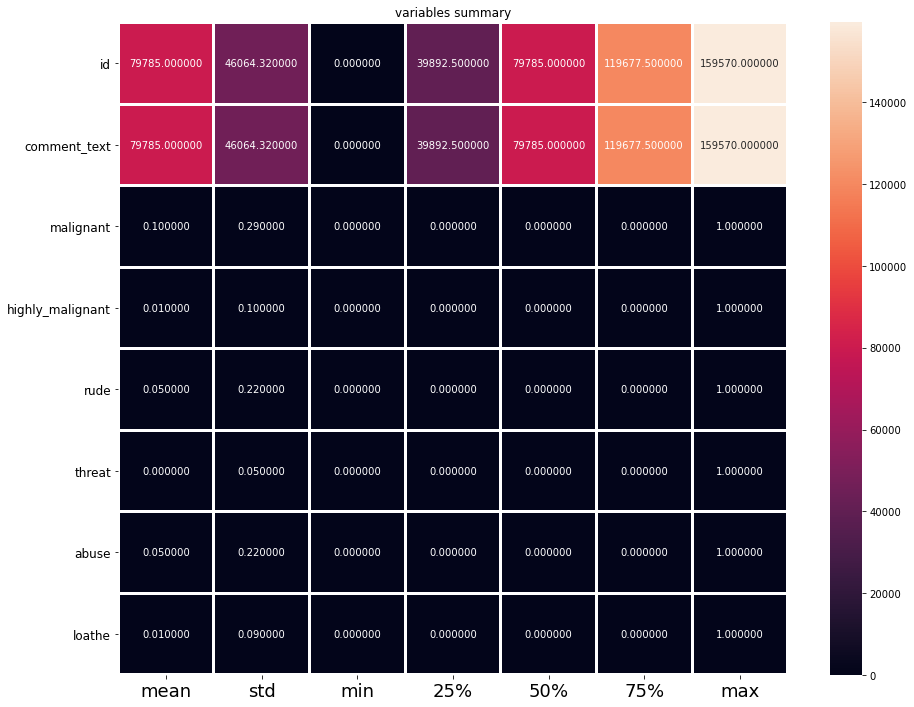

In [58]:
#plotting histogram for df.describe dataset
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables summary")
plt.show()

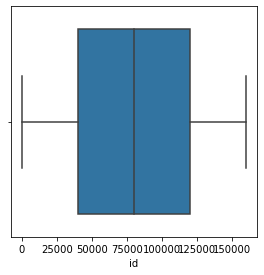

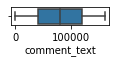

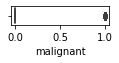

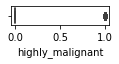

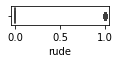

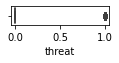

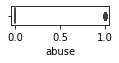

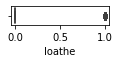

In [59]:
#checking outliers
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column], orient='v')
        plt.xlabel(column, fontsize=10)
    graph+=1
    plt.show()

In [60]:
# No outliers have been observed 

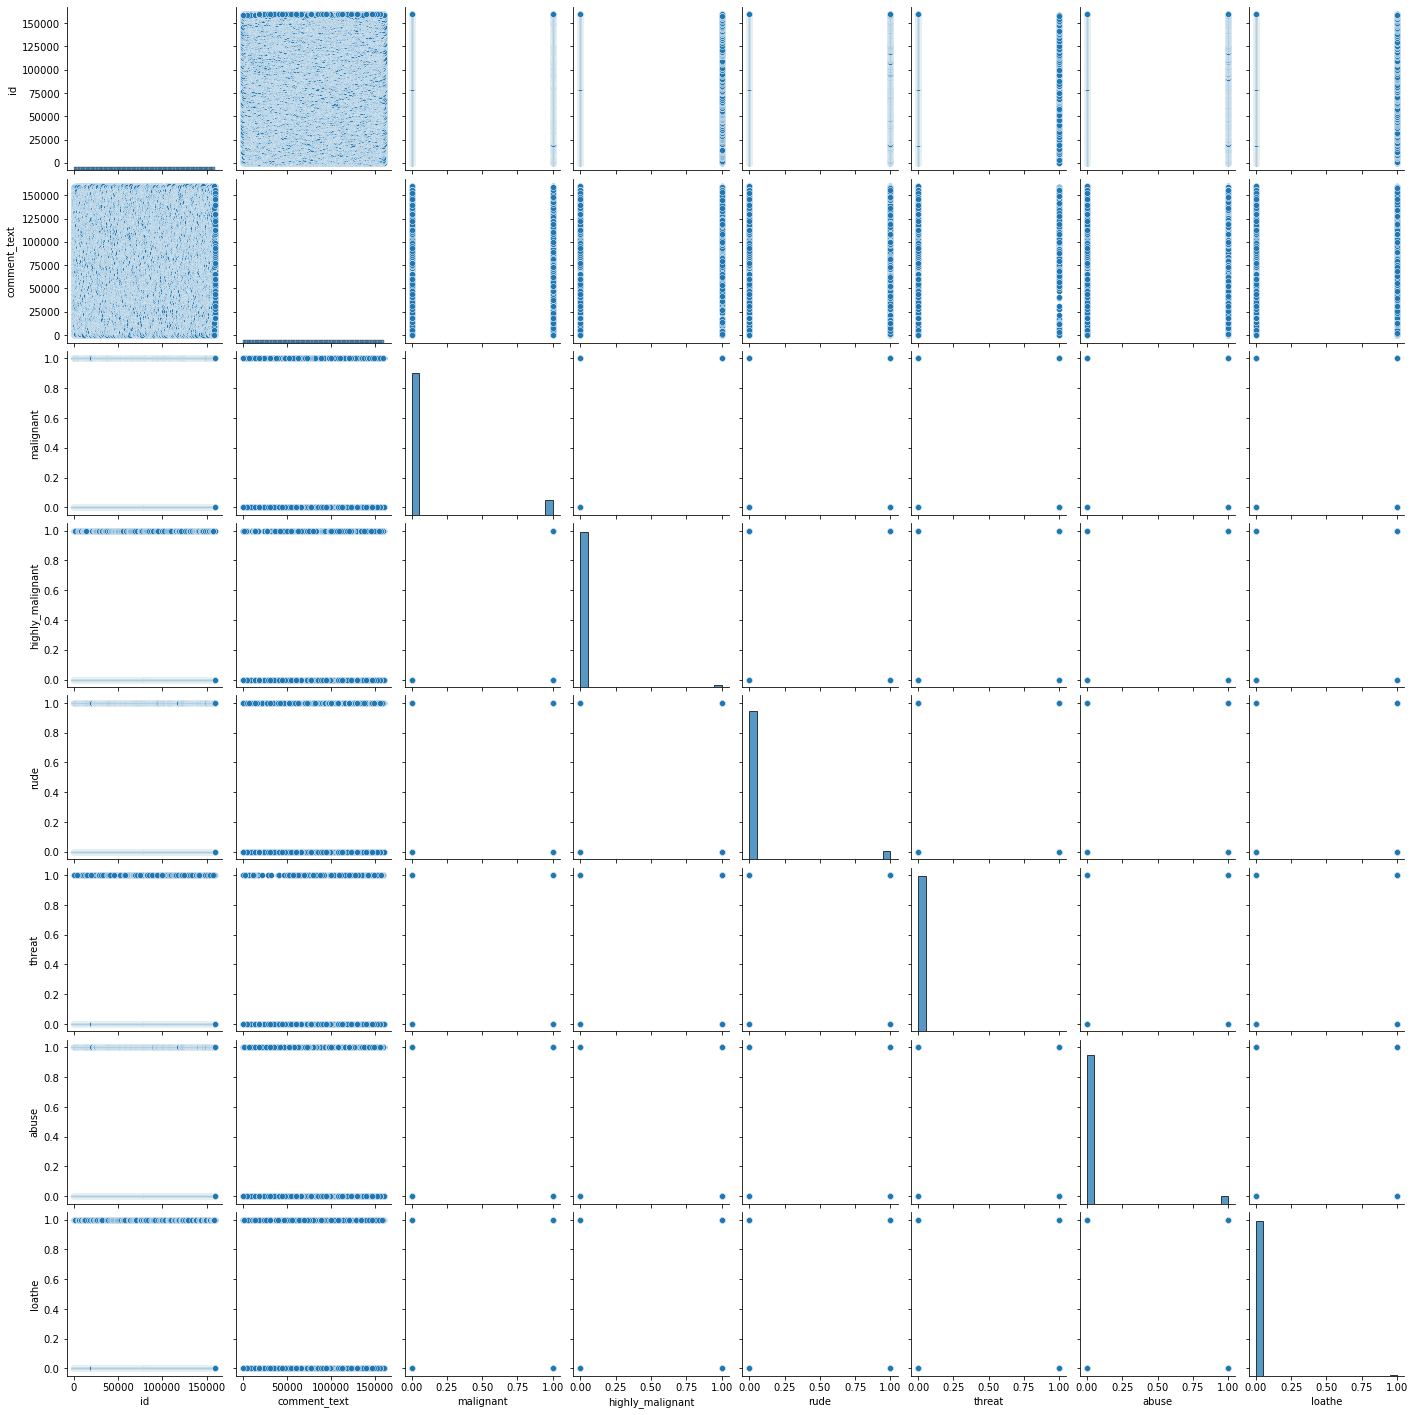

In [61]:
#plotting for seeing relation between columns-using pairplot
sns.pairplot(df)
plt.show()

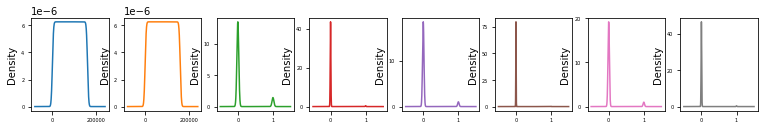

In [62]:
#check distribution for all the colunms
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=5,figsize=(18,12))
plt.show()

<AxesSubplot:xlabel='malignant', ylabel='Density'>

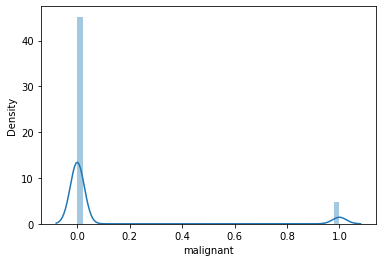

In [63]:
#checking distribution for cols.
sns.distplot(df["malignant"])  

In [64]:
#splitting data
x=df.drop("malignant", axis=1)
y=df["malignant"]

In [2]:
# no skewness observed in above observation, all values is near 0

In [68]:
#treating skewness
from sklearn.preprocessing import power_transform
x = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(x)

In [70]:
#target col. analysis
df["malignant"].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

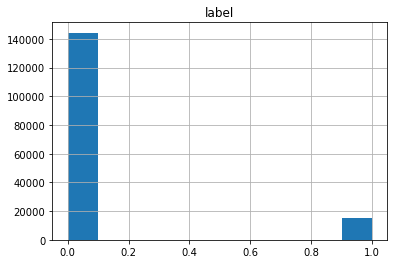

In [71]:
#univariate analysis
df["malignant"].hist(grid=True)
plt.title('label')
plt.show

In [72]:
#splitling into tRain and test
from sklearn.model_selection import train_test_split

In [73]:
#Handling Imbalance by oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [74]:
#again checking target col.
y_over.value_counts()

0    144277
1    144277
Name: malignant, dtype: int64

In [75]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [76]:
#finding best random State
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc= accuracy_score(y_test, predf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is", maxAcc, "on Random_state", maxRS)

Best accuracy is 0.8144415642024425 on Random_state 47


In [78]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=.30, random_state=47)

In [79]:
#model building-Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
prelr = LR.predict(x_test)
print(accuracy_score(y_test,prelr))
print(confusion_matrix(y_test,prelr))
print(classification_report(y_test,prelr))

0.813323783889935
[[43143   243]
 [15917 27264]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     43386
           1       0.99      0.63      0.77     43181

    accuracy                           0.81     86567
   macro avg       0.86      0.81      0.81     86567
weighted avg       0.86      0.81      0.81     86567



In [80]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8381831413818198
[[35994  7392]
 [ 6616 36565]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     43386
           1       0.83      0.85      0.84     43181

    accuracy                           0.84     86567
   macro avg       0.84      0.84      0.84     86567
weighted avg       0.84      0.84      0.84     86567



In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8673628518950639
[[38817  4569]
 [ 6913 36268]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     43386
           1       0.89      0.84      0.86     43181

    accuracy                           0.87     86567
   macro avg       0.87      0.87      0.87     86567
weighted avg       0.87      0.87      0.87     86567



In [83]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8381831413818198
[[35994  7392]
 [ 6616 36565]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     43386
           1       0.83      0.85      0.84     43181

    accuracy                           0.84     86567
   macro avg       0.84      0.84      0.84     86567
weighted avg       0.84      0.84      0.84     86567



In [82]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
kc.fit(x_train,y_train)
prekc=kc.predict(x_test)
print(accuracy_score(y_test,prekc))
print(confusion_matrix(y_test,prekc))
print(classification_report(y_test,prekc))

0.8591726639481557
[[36703  6683]
 [ 5508 37673]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     43386
           1       0.85      0.87      0.86     43181

    accuracy                           0.86     86567
   macro avg       0.86      0.86      0.86     86567
weighted avg       0.86      0.86      0.86     86567



In [84]:
#for validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x, y, cv=3)
print("Cross validation score of LogisticRegression model :", scr.mean())

Cross validation score of LogisticRegression model : 0.9583320346581029


In [85]:
scr=cross_val_score(dt, x, y, cv=3)
print("Cross validation score of DecisionTree model :", scr.mean())

Cross validation score of DecisionTree model : 0.9249049097042255


In [86]:
scr=cross_val_score(rf, x, y, cv=3)
print("Cross validation score of RandomForest model :", scr.mean())

Cross validation score of RandomForest model : 0.9565710629743033


In [89]:
scr=cross_val_score(svc, x, y, cv=3)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.9586203071579257


In [90]:
scr=cross_val_score(kc, x, y, cv=3)
print("Cross validation score of knn model :", scr.mean())

Cross validation score of knn model : 0.9569909366848571


In [91]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV

In [92]:
#Decisiontree Classifier
parameters = {'splitter' :['best', 'random'],
            'max_features': ['auto', 'sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini', 'entropy']}

In [93]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameters,cv=3)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [95]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [96]:
mod=DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2', splitter= 'best')

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

77.24999133619046


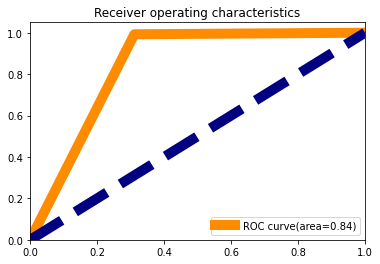

In [97]:
#AUC_ROC Curve
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=10,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#getting ROC curve area 0.84, AUC score is 84%

In [98]:
#saving model
import joblib
joblib.dump(mod,"Maligant prediction.pkl")

['Maligant prediction.pkl']

# TEST dataset

In [99]:
# Importing dataset
import pandas as pd
df = pd.read_csv( r"C:\Users\Rahul\Downloads\maligant intern project\test.csv")
df.head(20)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [100]:
df.shape

(153164, 2)

In [ ]:
# Their are 153164 rows and 2 columns

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [104]:
df.dtypes

id              object
comment_text    object
dtype: object

In [ ]:
#only one type of dataset is observed in test dataset i.e. object

In [105]:
#checking null values
df.isnull().sum()

id              0
comment_text    0
dtype: int64

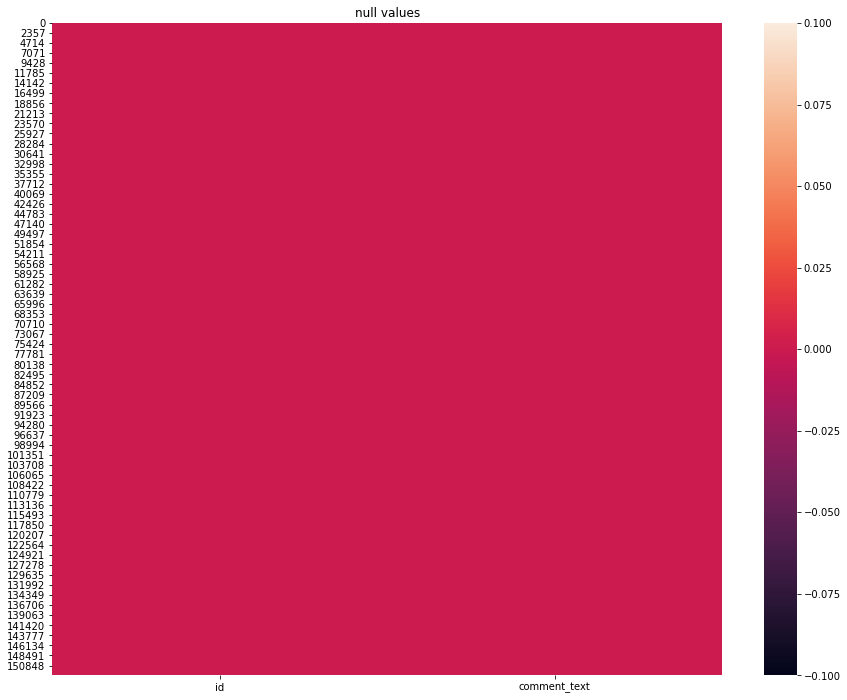

In [106]:
#Heatmap for checking null values
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [ ]:
# no null values present in test dataset from above observation

In [107]:
#Converting object type data into integers
encode = LabelEncoder() 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [108]:
#multivariate analysis
corr_mat=df.corr()
corr_mat

,id,comment_text
id,1.00000,-0.00202
comment_text,-0.00202,1.00000


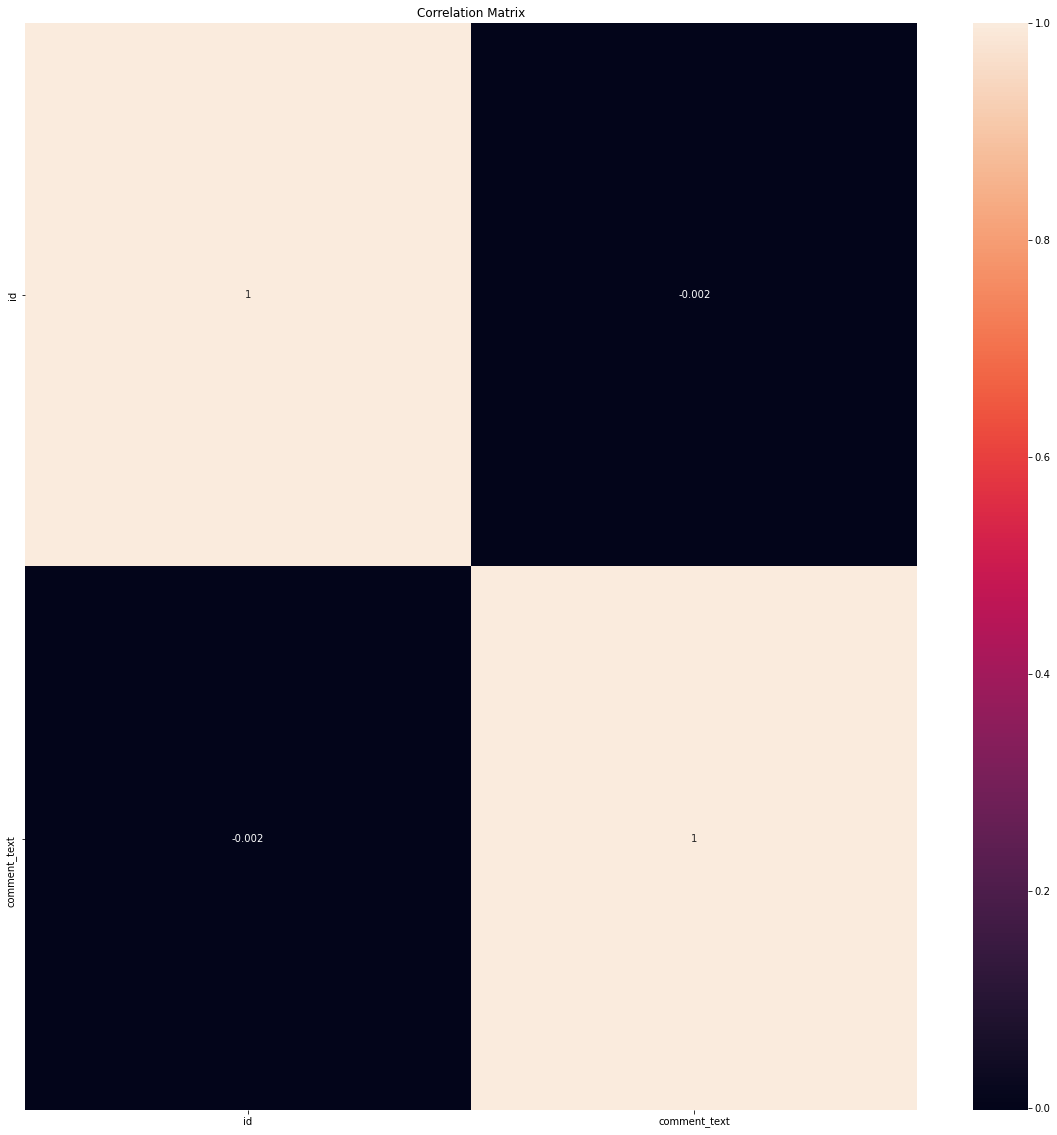

In [109]:
# heatmap for analysing correlation
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()